In [159]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/titanic.csv


In [ ]:
#MOHUL Y P ->PES1UG22CS360
#MUDAR PRANAV -> PES1UG22CS362
#MAHIMA N R -> PES1UG22CS323

In [160]:
df = pd.read_csv('/kaggle/input/titanic/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [161]:
df.shape


(891, 12)

In [162]:
#question 1
#Survived is Ratio --> Binary variable indicating survival (0 = Did not survive, 1 = Survived)
#PassengerId is Ordinal
#PClass is Ordinal --> The class has a clear order, with 1st class being higher than 2nd and 3rd class
#Name is Nominal --> Nominal categories without a meaningful order
#sex is Nominal --> Male or Female, which doesn't have a numerical order
#Age is Ratio --> Age in years, with a meaningful zero point (birth)
#Sibsp is Ordinal --> It represents the number of siblings or spouses onboard and can be ordered
#Parch is Ordinal -->  The number of parents or children onboard can be ordered as 0, 1, 2, etc
#Ticket is Nominal --> Nominal categories without a meaningful order
#Fare is Ratio --> Ticket fare, with a meaningful zero point (no fare)
#Cabin is Nominal -->No meaningful order 
#Embarked is Nominal --> Nominal categories without a meaningful order

In [163]:
# question number 2

#PassengerId: no central tendency measures.

#Survived: mode. 

#Pclass: mode

#Name: no central tendency measure.

#Sex: mode

#Age: mean 
#SibSp: mean
#Parch: mean
#Ticket: no central tendency measure.

#Fare: mean
#Cabin: no central tendency measure.

#Embarked: mode

In [164]:
numerical_columns = df.select_dtypes(include=['number'])
std = numerical_columns.std()
min = numerical_columns.min()
max = numerical_columns.max()
range = max - min
print(std)


PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             14.526497
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64


In [165]:
print(range)

PassengerId    890.0000
Survived         1.0000
Pclass           2.0000
Age             79.5800
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64


In [166]:
#question 3
df.isna().sum()
#we see age,cabin, embarked have some missing values.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [167]:
#we will replace missing age values with the mean of ages that exist
mean = df['Age'].mean()
df['Age'].fillna(mean, inplace=True)
#since a lot of cabin values are empty, we will create a new category called 'unknown'
df['Cabin'].fillna('Unknown', inplace=True)
#since only 2 embarked values are empty, we will drop them
df.dropna(subset=['Embarked'], inplace=True)


In [168]:
df1 = df.drop_duplicates(subset=['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],keep = 'last')
df1
#dropping any duplicated values if any

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


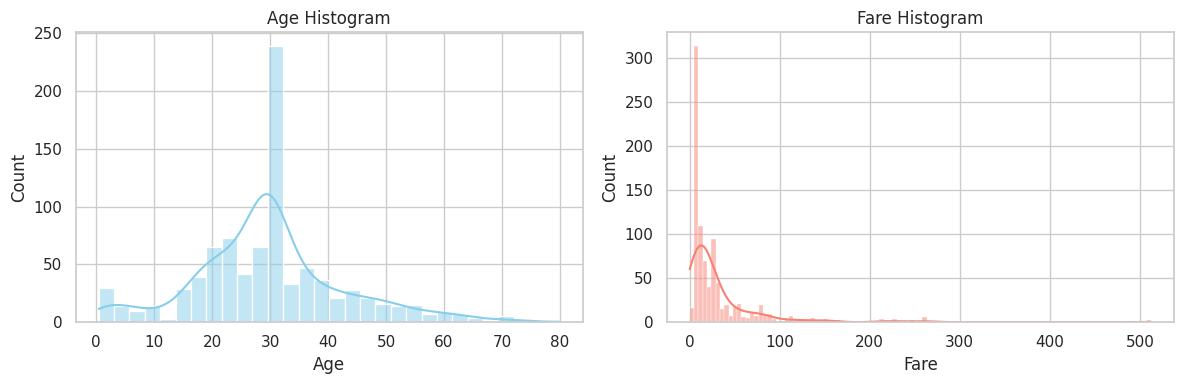

In [169]:
#question 4
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))


sns.histplot(df1['Age'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Age Histogram')

sns.histplot(df1['Fare'], ax=axes[1], kde=True, color='salmon')
axes[1].set_title('Fare Histogram')

plt.tight_layout()
plt.show()


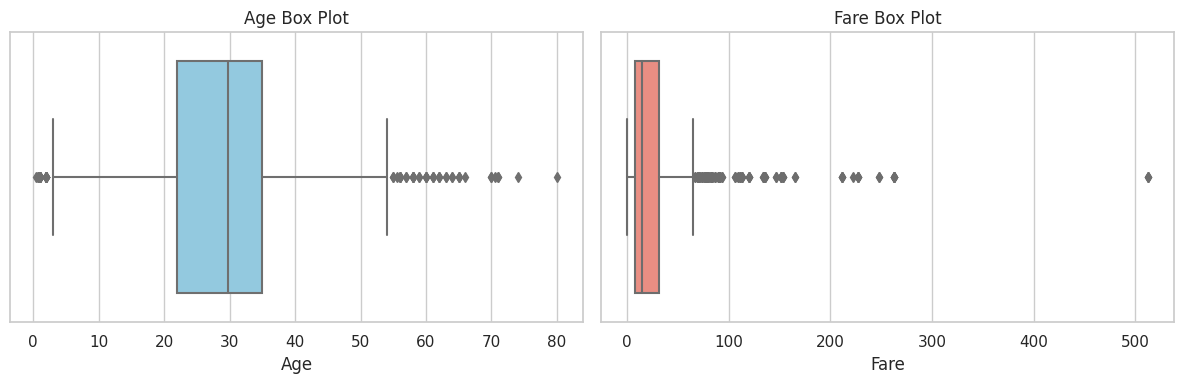

In [170]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.boxplot(x=df1['Age'], ax=axes[0], color='skyblue')
axes[0].set_title('Age Box Plot')

sns.boxplot(x=df1['Fare'], ax=axes[1], color='salmon')
axes[1].set_title('Fare Box Plot')

plt.tight_layout()
plt.show()


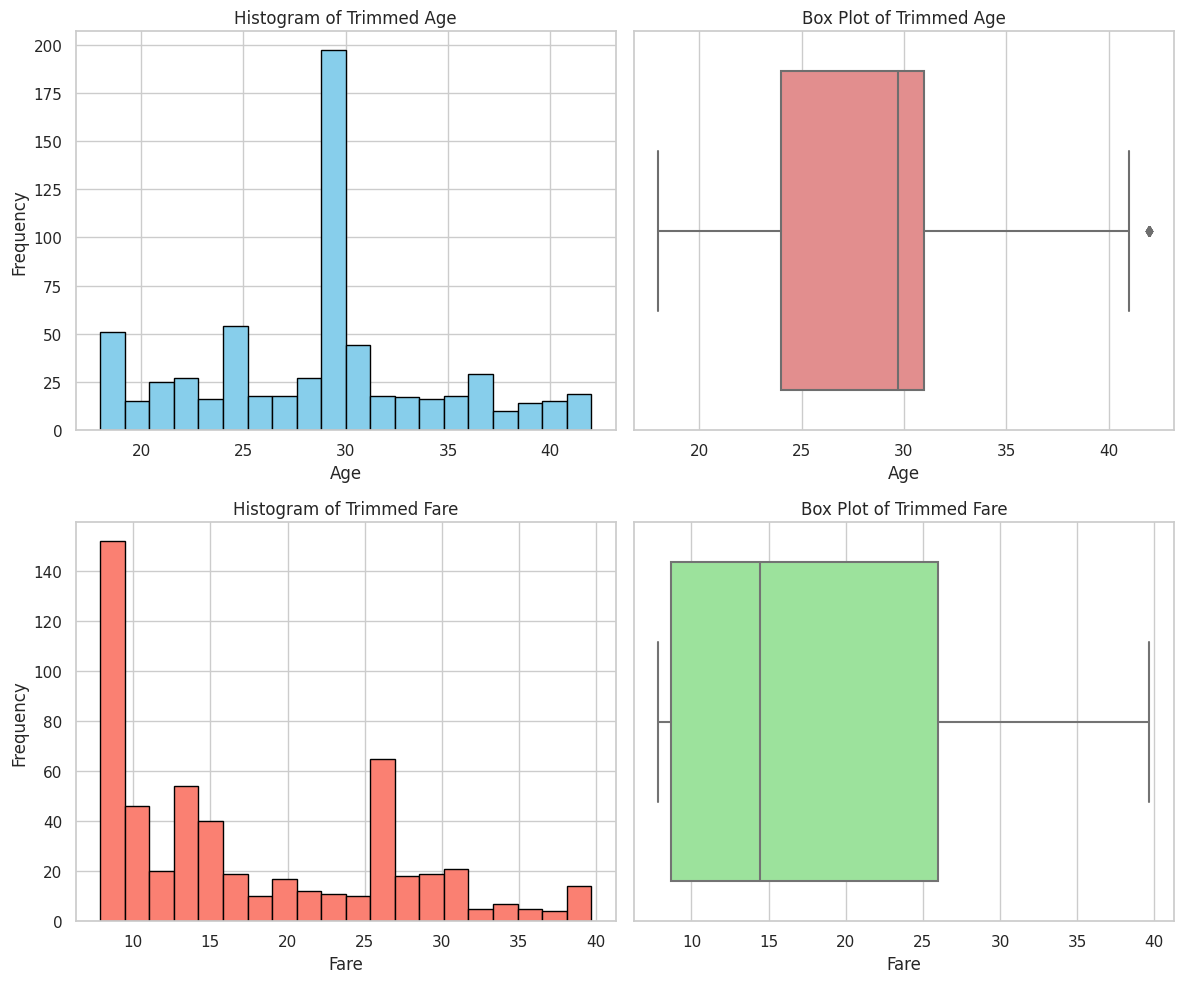

In [171]:
#question 5
def trim_data(df1, column, lower_percentile, upper_percentile):
    lower_bound = df1[column].quantile(lower_percentile)
    upper_bound =df1[column].quantile(upper_percentile)
    return df1[(df1[column] >= lower_bound) & (df1[column] <= upper_bound)]

df1_trimmed_age = trim_data(df1, 'Age', 0.15, 0.85)
df1_trimmed_fare = trim_data(df1, 'Fare', 0.20, 0.80)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))


axes[0, 0].hist(df1_trimmed_age['Age'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Histogram of Trimmed Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

sns.boxplot(x=df1_trimmed_age['Age'], ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Box Plot of Trimmed Age')

axes[1, 0].hist(df1_trimmed_fare['Fare'], bins=20, color='salmon', edgecolor='black')
axes[1, 0].set_title('Histogram of Trimmed Fare')
axes[1, 0].set_xlabel('Fare')
axes[1, 0].set_ylabel('Frequency')

sns.boxplot(x=df1_trimmed_fare['Fare'], ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Box Plot of Trimmed Fare')

plt.tight_layout()
plt.show()

In [172]:
#Unsually tall graphs in Histogram or gaps are outliers
#Points beyond the whisker of a box-plot are outliers

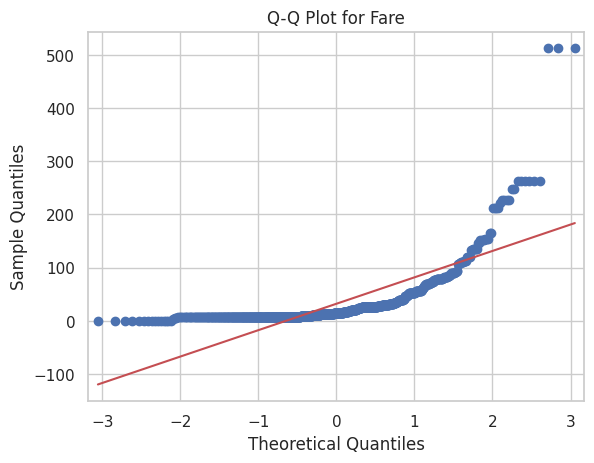

In [173]:
#question 6
import statsmodels.api as sm
sm.qqplot(df1['Fare'], line='s')  
plt.title('Q-Q Plot for Fare')
plt.show()


In [174]:
#Conclusion: The 'Fare' variable deviates from a normal distribution.
#Rationale: There may be skewness or other departures from normality.

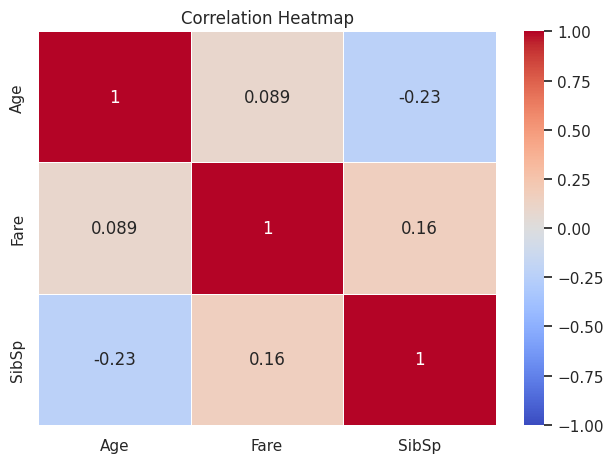

In [175]:
#question 7
correlation_matrix = df1[['Age', 'Fare', 'SibSp']].corr()
correlation_threshold = 0.2
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [176]:
#question 8
df1['sex'] = df.Sex.map({
    'male' : 1,
    'female' : 0
})
df1 = df1.drop('Sex',axis = 1)
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


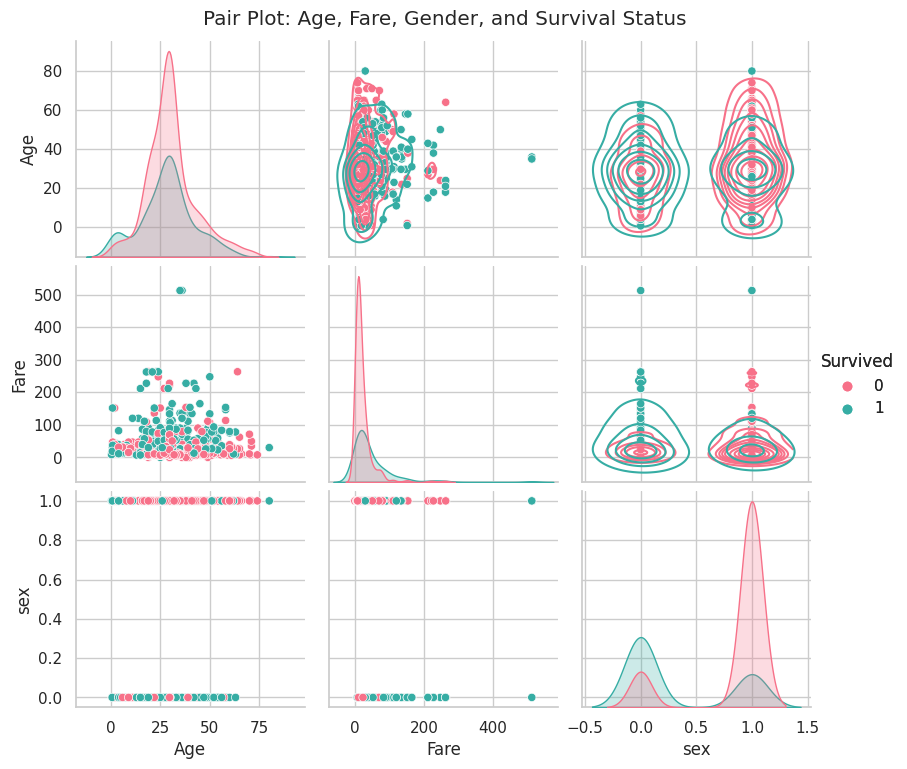

In [177]:

sns.set(style="whitegrid")
pair_plot = sns.pairplot(data=df1, vars=['Age','Fare','sex'], hue='Survived', diag_kind='kde', palette='husl')
pair_plot.map_upper(sns.kdeplot)
pair_plot.add_legend()
pair_plot.fig.suptitle("Pair Plot: Age, Fare, Gender, and Survival Status", y=1.02)
plt.show()

In [178]:
#insights are 
# age vs fare : middle aged people could buy more expensive tickets
#age vs sex : there were more range of ages in males than females.
#fare vs sex : males had lesser value fares than females

#survival vs fare : people with more expensive fares, survived
#survival vs sex :  females had a more chance of survival than males
#survival vs age : older people had less chance of surviving than younger people


In [179]:
#question 9
#Null Hypothesis (H0): The mean fare for survivors is equal to the mean fare for non-survivors.
#Alternate Hypothesis (H1): The mean fare for survivors is different from the mean fare for non-survivors.

In [180]:
import scipy.stats as stats

fare_survived = df[df['Survived'] == 1]['Fare']
fare_non_survived = df[df['Survived'] == 0]['Fare']
t_stat, p_value = stats.ttest_ind(fare_survived, fare_non_survived)
alpha = 0.05
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
   print("Reject the null hypothesis. There is a significant difference in fares between survivors and non-survivors.")
else:
    print("Fail to reject the null hypothesis. Fare does not have a significant impact on survival chances.")


T-statistic: 7.8637704094143785
P-value: 1.0797887540538483e-14
Reject the null hypothesis. There is a significant difference in fares between survivors and non-survivors.


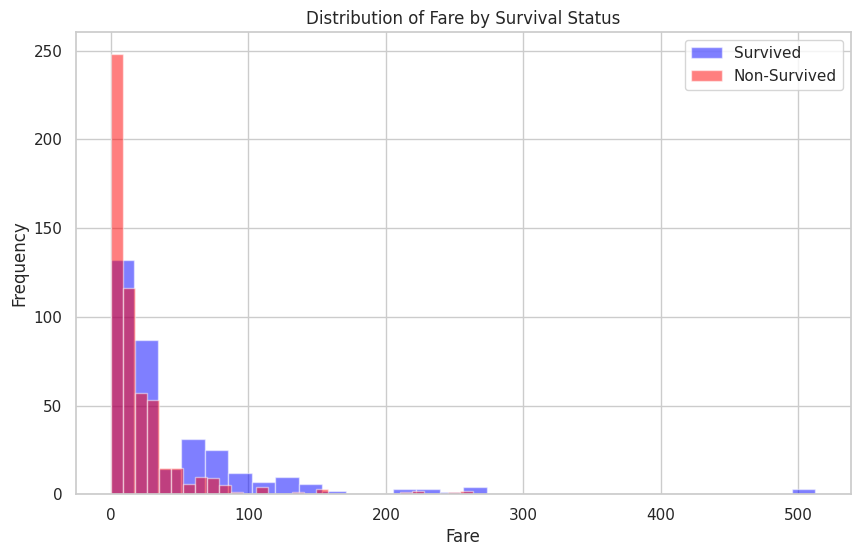

In [181]:
import matplotlib.pyplot as plt

# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(fare_survived, bins=30, alpha=0.5, label='Survived', color='blue')
plt.hist(fare_non_survived, bins=30, alpha=0.5, label='Non-Survived', color='red')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare by Survival Status')
plt.legend()
plt.show()


In [182]:
#question 10
mean_survived_fare = np.mean(fare_survived)
mean_non_survived_fare = np.mean(fare_non_survived)
std_dev_survived_fare = np.std(fare_survived, ddof=1)  # ddof=1 for sample standard deviation
std_dev_non_survived_fare = np.std(fare_non_survived, ddof=1)
n_survived = len(fare_survived)
n_non_survived = len(fare_non_survived)
se_survived = std_dev_survived_fare / np.sqrt(n_survived)
se_non_survived = std_dev_non_survived_fare / np.sqrt(n_non_survived)
# Assuming 95% confidence level, the critical value is 1.96 for a two-tailed test
critical_value = 1.96
margin_of_error = critical_value * np.sqrt(se_survived**2 + se_non_survived**2)

print("Margin of Error:", margin_of_error)


Margin of Error: 7.565367666512479
